In [24]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.

from matplotlib.pylab import plt
import matplotlib.cm as cm
%matplotlib inline

In [21]:
data1=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/data1.csv")
X = data1.values
data1.head()

,0,1,2,3,4
0,7.041668,0.679020,-8.408575,3.461746,-5.597806
1,-4.816582,-0.430385,0.753123,0.264526,3.965808
2,4.096806,-6.559957,-4.302680,-5.615232,5.635794
3,4.962203,-6.756521,-5.252219,-6.075322,2.754351
4,7.039362,0.263419,-7.505487,1.981984,-10.156349


# Clusters K Means

In [23]:
#Use package from sklearn.

n=2 # number of clusters

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(X)

#labels of the model
print res.labels_

#predict based on new data
print res.predict(X)

data1['cluster'] = res.labels_

[1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
[1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0]


# Silhouette
For knowing how many clusters are better. The Silhouette score is a measurement of the distance of each point to its current cluster centroid, in comparisson withthe closest cluster's centroid. An average is computed for every point, an returned. As the number of clusters increases, we will reach a local maxima (eventually if there is the same amount of clusters as there is points, then each point will be is own centroid and the Silhouette score will be the maximum), that will tell us the optimum amoun of clusters.

In [19]:
maxK = 10

for n_clusters in range(2,maxK):
    #run the clustering
    km = KMeans(n_clusters=n_clusters, random_state=123)
    #assign labels of clusters
    cluster_labels = km.fit_predict(X)
    #calculate average for each cluster
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.436009251691
For n_clusters =3, the average silhouette_score is :0.52980424031
For n_clusters =4, the average silhouette_score is :0.647634554445
For n_clusters =5, the average silhouette_score is :0.755843849066
For n_clusters =6, the average silhouette_score is :0.6433044437
For n_clusters =7, the average silhouette_score is :0.552105840027
For n_clusters =8, the average silhouette_score is :0.41784175399
For n_clusters =9, the average silhouette_score is :0.327953497283


A silhoutte value can be calculated for each point within eahc cluster, and plot it. If all of the points have a silhouette score below the average silhouette of the configuration, then that cluster shouldn't exist. It could be that in fact there are two clusters in there (first plot), or that two clusters should be merged into one (last two plots).

In [15]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

('For n_clusters =', 4, 'The average silhouette_score is :', 0.64763455444541163)


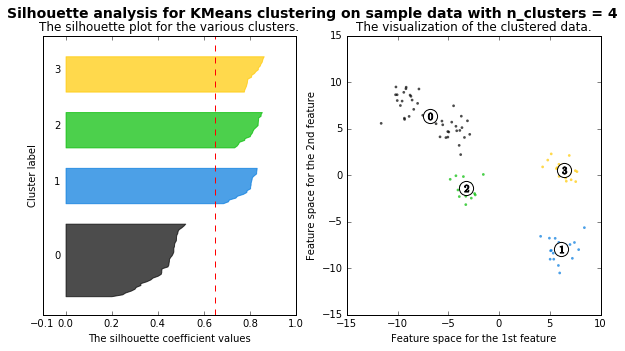

('For n_clusters =', 5, 'The average silhouette_score is :', 0.75584384906559587)


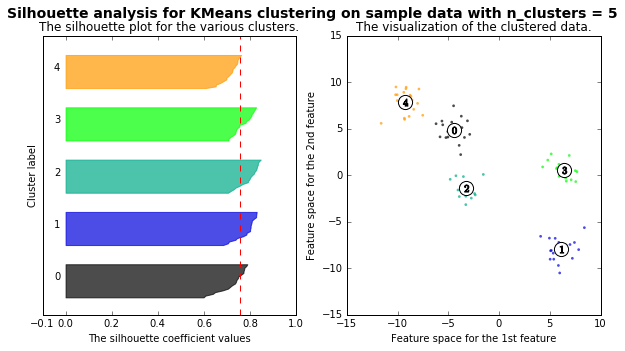

('For n_clusters =', 6, 'The average silhouette_score is :', 0.66568460988849953)


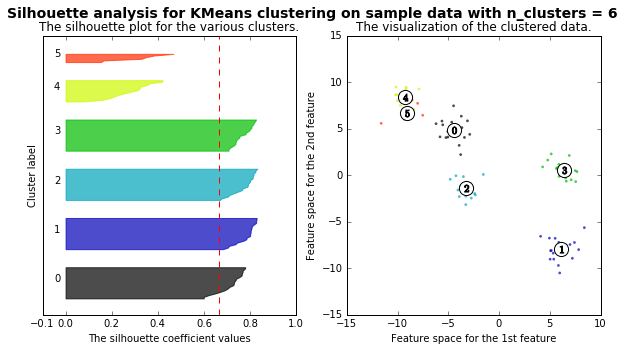

('For n_clusters =', 7, 'The average silhouette_score is :', 0.54165758185003976)


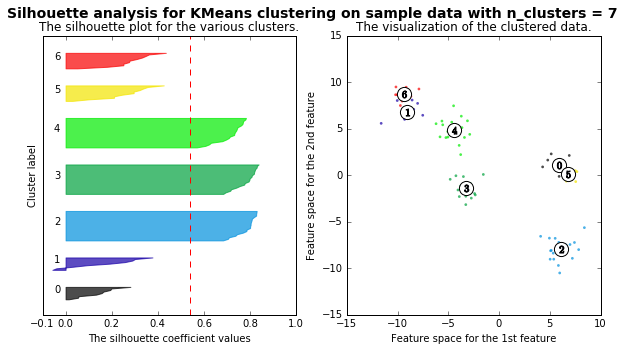

In [18]:
silhouette_score_plot(X,range(4,8))

# Elbow

In [9]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

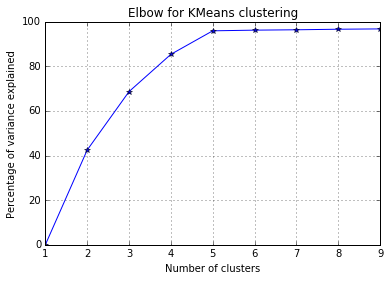

In [11]:
elbow(X, range(1,maxK))

# Gaussian mixture

In [26]:
gm=GaussianMixture(n_components=n,random_state=324)

res1=gm.fit(X)

print res1.predict(X)

[0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0]
